In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from clean import clean_json
from scrape import scrape_multiple_years
import os

import simple_visualization as sv

$$ \textbf{Préparation des données} $$

$\textbf{Définition de input\_ path et ouput\_ path pour les saisons de 2018 à 2020}$

In [2]:
# Saison 2018/2019
input_path_2018 = os.path.join('data\datasets','2018.json')
output_path_2018 = os.path.join('data\datasets','2018.csv')
# Saison 2019/2020
input_path_2019 = os.path.join('data\datasets','2019.json')
output_path_2019 = os.path.join('data\datasets','2019.csv')
# Saison 2020/2021
input_path_2020 = os.path.join('data\datasets','2020.json')
output_path_2020 = os.path.join('data\datasets','2020.csv')

$\textbf{Récupération des DataFrames nettoyés}$

In [3]:
# Saison 2018/2019
df_1 = clean_json(input_path_2018, output_path_2018)
# Saison 2019/2020
df_2 = clean_json(input_path_2019, output_path_2019)
# Saison 2020/2021
df_3 = clean_json(input_path_2020, output_path_2020)

$$\textbf{QUESTION 1 :}$$
$$\text{On travaille sur les données de la saison 2018/2019}$$

In [4]:
import matplotlib.pyplot as plt

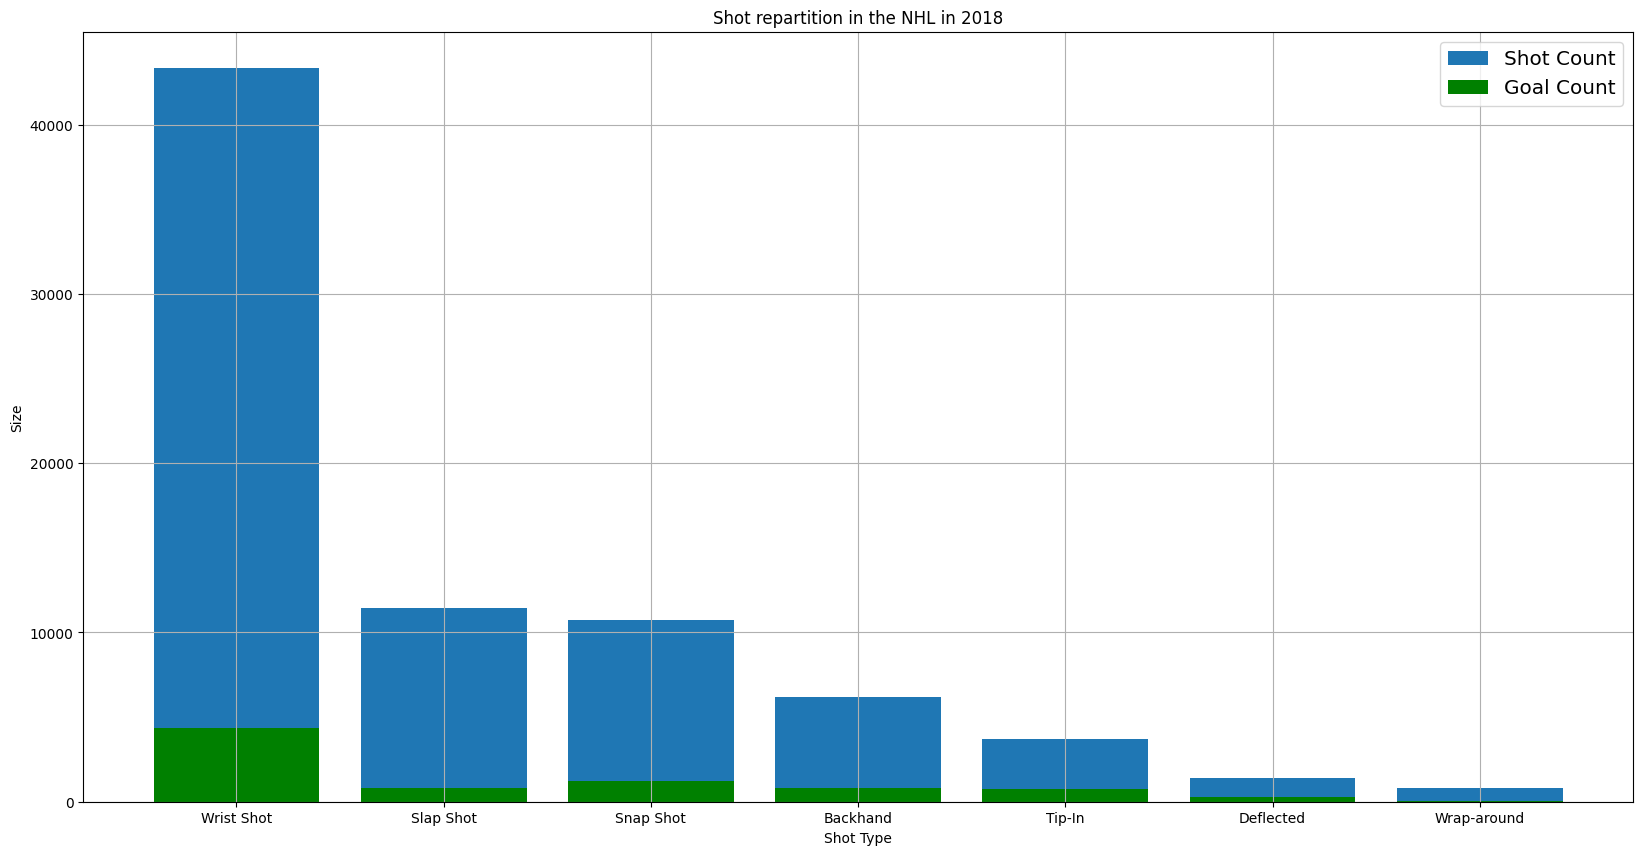

In [5]:
# Pour la saison 2018/2019
sv.plot_shot_repartition_NHL(df_1,2018)

In [38]:
# On calcule l'efficacité par type de tir 
shot_count, goal_count = sv.get_shot_repartition_NHL(df_1)

shot_count.sort_index
goal_count.sort_index

total_attempts = shot_count.values + goal_count.values

efficiency_table = pd.DataFrame(index = shot_count.index)
efficiency_table['efficiency'] = (goal_count.values/total_attempts)*100

In [39]:
efficiency_table

,efficiency
shot_type,
Wrist Shot,9.084040
Slap Shot,9.567755
Snap Shot,7.124352
Backhand,11.248384
Tip-In,17.107309
Deflected,15.723645
Wrap-around,6.764374


$ \textbf{Interprétation :} $

- Sur la saison 2018/2019, on voit que le type de tir le plus efficace est le Tip-In avec une efficacité de 17.1%; Ceci s'explique par le fait que ce tir est effectué à courte distance des cages. Il est donc plus difficile pour le gardien de but d'effectuer un arrêt à une telle distance.

- Le tir le plus courant est le 'Wrist Shot' avec plus de 47000 tirs (Shot et Goal) par saison. Ce tir est avantageux car il est rapide à effectuer, précis et potentiellement puissant. (https://fr.wikipedia.org/wiki/Tir_(hockey_sur_glace))

- Pour cette visualisation, nous avons choisi un histogramme car il est plus facile de visualiser le volume de tir pour chacun des types de tir. Nous proposons plus bas une autre forme de visualisation, sous forme de diagramme en camembert, mais celle-ci ne nous permet d'observer que la répartition des types de tirs

$$ \textbf{ADDITIONNEL :} $$
$$ \text{Création d'un outil de visualisation interactif sur la répartition des tirs pour une équipe donnée} $$

In [42]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [43]:
def plot_interactive_hist(team_name):
    sv.hist_shot_repartition_by_team(team_name, df_1, 2018)

In [44]:
team_list = df_1['attacking_team_name'].unique()
team_dropdown = widgets.Dropdown(
    options=team_list,
    description='Team:'
)

In [45]:
interactive_plot = widgets.interactive(plot_interactive_hist, team_name=team_dropdown)
display(interactive_plot)

interactive(children=(Dropdown(description='Team:', options=('Montréal Canadiens', 'Toronto Maple Leafs', 'Was…

$$ \textbf{Une autre forme de visualisation} $$ 
$$\text{Visualisation de la répartition des tirs sous forme d'un graphe en camembert}$$

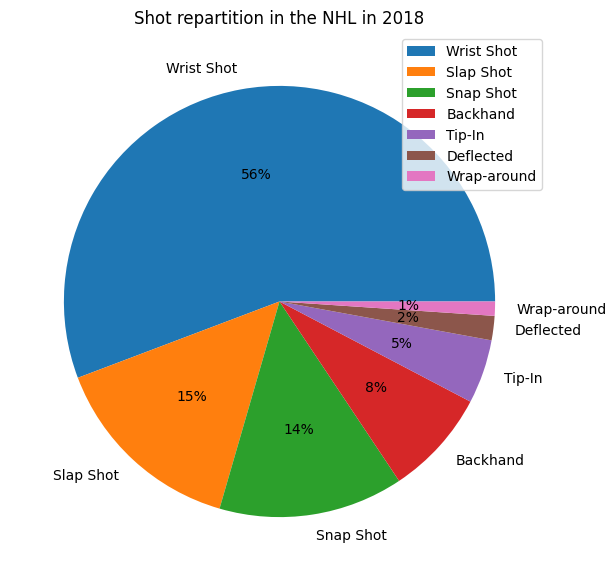

In [46]:
sv.pie_shot_repartition_NHL(df_1,2018)

- Ce graphe nous permet de voir clairement que le type de tir le plus courant est le "Wrist Shot". Mais on ne npeut pas effectuer plus de commentaires sur la dangerosité des tirs.

$$  \textbf{QUESTION 2 :} $$ 


In [47]:
# Saison 2018/2019
df_1 = sv.df_add_distance_to_net(df_1)
# Saison 2019/2020
df_2 = sv.df_add_distance_to_net(df_2)
# Saison 2020/2021
df_3 = sv.df_add_distance_to_net(df_3)

D'après le reglèment de la NHL, les joueurs n'ont pas le droit de tirer avant d'avoir passer la ligne médiane du terrain. 

La distance de tir maximale correspond aux extremités de la ligne médiane :
$$ d_{max} = \sqrt{89^{2} + 42.5^{2}} \approx 98 $$

On travaille donc avec des intervalles de 0 à 100 avec un pas de 2.5 

In [49]:
bins = np.arange(0,102.5,2.5)
bin_centers = np.arange(1.25, 100, 2.5)

In [50]:
counts = sv.regroup_by_range(df_1,bins, bin_centers)
    
shot_count = counts[counts['play_type'] == 'Shot']
goal_count = counts[counts['play_type'] == 'Goal']

In [ ]:
efficiency_table = pd.DataFrame(goal_count['count'].values/(shot_count['count'].values + goal_count['count'].values))
type(efficiency_table)

pandas.core.frame.DataFrame

In [ ]:
efficacy_rate = sv.get_efficiency_rate_by_distance(df, bins, bin_centers)

Text(0.5, 1.0, 'Efficacy rate in function of the distance from the net')

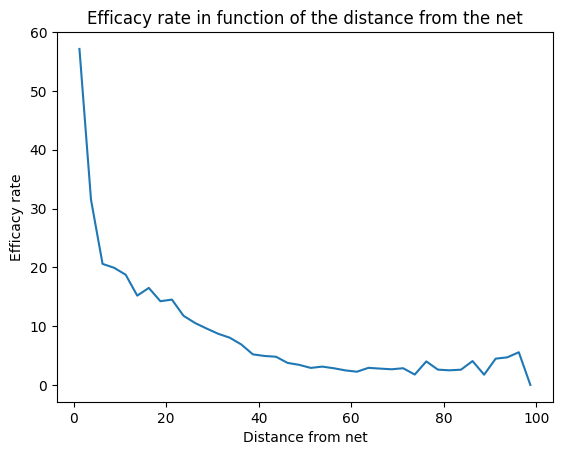

In [ ]:
plt.plot(bin_centers,100*efficacy_rate)
plt.xlabel('Distance from net')
plt.ylabel('Efficacy rate')
plt.title('Efficacy rate in function of the distance from the net')

In [ ]:
shot_type_list = df['shot_type'].unique()
shot_type_dropdown = widgets.Dropdown(
    options = shot_type_list,
    description='Shot Type:'
)

In [ ]:
def plot_efficiency_rate(shot_type):
    sv.plot_efficiency_rate_by_shot_type(shot_type, df, bins, bin_centers) 

In [ ]:
interactive_efficiency_plot = widgets.interactive(plot_efficiency_rate, shot_type=shot_type_dropdown)
display(interactive_efficiency_plot)

interactive(children=(Dropdown(description='Shot Type:', options=('Tip-In', 'Snap Shot', 'Wrist Shot', 'Slap S…